In [121]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

##모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.linear_model import Perceptron



##시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

##model selection 
from sklearn.model_selection import GridSearchCV

##모델 성능 비교
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [62]:
df=pd.read_csv('loan_cleaned.csv', index_col=0)

In [63]:
df=df.sample(frac=0.1, random_state=1)

In [64]:
df.head

<bound method NDFrame.head of         funded_amnt  int_rate  annual_inc  delinq_2yrs  inq_last_6mths  \
590306      25000.0     12.69    71040.00          0.0             0.0   
476089       9000.0      9.76    90000.00          0.0             0.0   
219165       8000.0     13.11    37000.00          0.0             0.0   
507177       8000.0     14.48   400000.00          0.0             2.0   
537730      22000.0     11.49    64000.00          0.0             1.0   
180422      24250.0     22.47    55000.00          2.0             1.0   
686192      17000.0     16.55    66000.00          0.0             0.0   
268242       2800.0      9.17    30000.00          0.0             0.0   
54754       10000.0     14.30    50000.00          1.0             0.0   
575549      25000.0     20.99    68000.00          0.0             1.0   
886389       6000.0      6.99   139000.00          0.0             0.0   
260628       7200.0     13.66    36735.41          0.0             0.0   
18815   

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8398 entries, 590306 to 291538
Data columns (total 15 columns):
funded_amnt                8398 non-null float64
int_rate                   8398 non-null float64
annual_inc                 8398 non-null float64
delinq_2yrs                8398 non-null float64
inq_last_6mths             8398 non-null float64
pub_rec                    8398 non-null float64
last_pymnt_amnt            8398 non-null float64
loan_status_dummy          8398 non-null int64
home_ownership_MORTGAGE    8398 non-null int64
home_ownership_OTHER       8398 non-null int64
home_ownership_OWN         8398 non-null int64
home_ownership_RENT        8398 non-null int64
term_ 36 months            8398 non-null int64
term_ 60 months            8398 non-null int64
emp_length_years           8398 non-null float64
dtypes: float64(8), int64(7)
memory usage: 1.0 MB


In [66]:
X=df.drop(['loan_status_dummy'], axis=1)
y=df['loan_status_dummy']

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8398 entries, 590306 to 291538
Data columns (total 14 columns):
funded_amnt                8398 non-null float64
int_rate                   8398 non-null float64
annual_inc                 8398 non-null float64
delinq_2yrs                8398 non-null float64
inq_last_6mths             8398 non-null float64
pub_rec                    8398 non-null float64
last_pymnt_amnt            8398 non-null float64
home_ownership_MORTGAGE    8398 non-null int64
home_ownership_OTHER       8398 non-null int64
home_ownership_OWN         8398 non-null int64
home_ownership_RENT        8398 non-null int64
term_ 36 months            8398 non-null int64
term_ 60 months            8398 non-null int64
emp_length_years           8398 non-null float64
dtypes: float64(8), int64(6)
memory usage: 984.1 KB


In [68]:
#train set, test set split
X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                  test_size=0.2,
                                                  random_state=43,
                                                  stratify=y)                                                  

In [69]:
#split이 같은 비율로 잘되었나 확인
y_train.sum()/len(y_train)

0.07948794284013098

In [70]:
y_test.sum()/len(y_test)

0.07916666666666666

In [71]:
#정규화
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

C:\Users\renz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\renz\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\renz\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [72]:
np.mean(X_train), np.std(X_train)

(6.194924545180136e-18, 1.0)

# Classification Model

In [129]:
##gridsearch cv 함수 만들기
all_model_name=[]
all_cross_score=[]
all_accuracy_score=[]
all_precision_score=[]

def do_gscv(model, params_dict, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model_name=model.__class__.__name__
    all_model_name.append(model_name)
    model=GridSearchCV(estimator=model,
                 param_grid=params_dict,
                 scoring='accuracy',
                 n_jobs=-1,
                 cv=10)
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    ac_score=accuracy_score(y_test, pred)
    all_accuracy_score.append(ac_score)
    print("##"+model_name+"##")
    print('Accuracy:%0.2f' %ac_score)
    pr_score=precision_score(y_test, pred)
    all_precision_score.append(pr_score)
    print('Precision:%0.2f' %pr_score)
    print(confusion_matrix(y_test, pred))
    print(model.best_params_)
    cv_score=[]
    for i in range(10):
        cv_score.append(model.cv_results_['split'+str(i)+'_test_score'][model.best_index_])
    all_cross_score.append(cv_score)
    
 

In [131]:
##model과 params dict 만들기

all_model=[DecisionTreeClassifier(), 
           RandomForestClassifier(), 
           BaggingClassifier(), 
           KNeighborsClassifier(), 
           AdaBoostClassifier(),
           SVC(),
           Perceptron()]
all_params_dict=[{'criterion': ['gini', 'entropy'],'max_depth': [1,2,3,4]},
                {'n_estimators':np.arange(1,30,5), 'criterion': ['gini', 'entropy'], 'max_depth':[1,2,3,4,5]},
                {'n_estimators': np.arange(1,30,5),'max_samples':[0.2,0.4,0.6,0.8,1.0]},
                {'n_neighbors': np.arange(1,6,1),'weights':['uniform', 'distance'],'algorithm':['auto','ball_tree', 'brute']},
                {'n_estimators': [50,100]},
                {'C': [0.1,1.0, 10.0],'kernel':['poly', 'linear', 'rbf']},
                {'penalty':['l1','l2'], 'alpha':[0.0001, 0.001,0.01,0.1,1.0,10.0,100.0], 'n_iter':[300, 350, 400], 'eta0':[0.1]}]

In [132]:
for model, params_dict in zip(all_model, all_params_dict):
    do_gscv(model, params_dict)
     

##DecisionTreeClassifier##
Accuracy:0.92
Precision:0.60
[[1539    8]
 [ 121   12]]
{'criterion': 'entropy', 'max_depth': 4}
##RandomForestClassifier##
Accuracy:0.92
Precision:0.73
[[1544    3]
 [ 125    8]]
{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 1}
##BaggingClassifier##
Accuracy:0.92
Precision:0.43
[[1535   12]
 [ 124    9]]
{'max_samples': 0.2, 'n_estimators': 26}
##KNeighborsClassifier##
Accuracy:0.91
Precision:0.08
[[1536   11]
 [ 132    1]]
{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'}
##AdaBoostClassifier##
Accuracy:0.92
Precision:0.56
[[1540    7]
 [ 124    9]]
{'n_estimators': 100}
##SVC##
Accuracy:0.92
Precision:0.00
[[1547    0]
 [ 133    0]]
{'C': 0.1, 'kernel': 'rbf'}


C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


##Perceptron##
Accuracy:0.92
Precision:0.00
[[1547    0]
 [ 133    0]]
{'alpha': 0.01, 'eta0': 0.1, 'n_iter': 300, 'penalty': 'l1'}


C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [133]:
compare1=pd.DataFrame(all_cross_score, index=all_model_name)
compare1

,0,1,2,3,4,5,6,7,8,9
DecisionTreeClassifier,0.916790,0.927192,0.921248,0.919762,0.910581,0.923994,0.919523,0.926975,0.915052,0.925484
RandomForestClassifier,0.919762,0.930163,0.921248,0.921248,0.919523,0.921013,0.923994,0.916542,0.916542,0.919523
BaggingClassifier,0.922734,0.919762,0.919762,0.919762,0.913562,0.923994,0.916542,0.921013,0.916542,0.923994
KNeighborsClassifier,0.916790,0.912333,0.913819,0.919762,0.919523,0.919523,0.915052,0.913562,0.919523,0.921013
AdaBoostClassifier,0.918276,0.924220,0.924220,0.918276,0.913562,0.921013,0.918033,0.923994,0.918033,0.922504
SVC,0.919762,0.919762,0.919762,0.919762,0.921013,0.921013,0.921013,0.921013,0.921013,0.921013
Perceptron,0.919762,0.919762,0.919762,0.919762,0.921013,0.921013,0.921013,0.921013,0.921013,0.921013


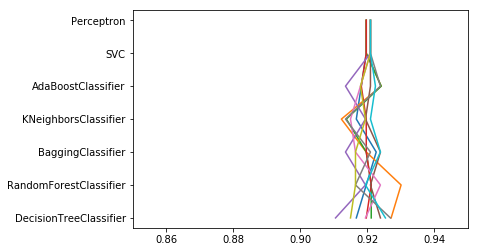

In [134]:
for i in range(10):
    plt.plot(compare1[i], compare1.index)
plt.xlim(0.85,0.95)
plt.show()

# Regression Model

In [136]:
##making regression functinon
all_model_name_reg=[]
all_cross_score_reg=[]
all_accuracy_score_reg=[]
all_precision_score_reg=[]

def dogs_reg(model_reg, params_dict_reg, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
        model_name=model_reg.__class__.__name__
        all_model_name_reg.append(model_name)
        model=GridSearchCV(estimator=model_reg,
                  param_grid=params_dict_reg,
                  n_jobs=-1,
                  cv=10)
        model.fit(X_train, y_train)
        pred_prob=model.predict(X_test)
        fpr,tpr, threshold=roc_curve(y_test, pred_prob)
        roc_result=pd.DataFrame([fpr, tpr, threshold], index=['fpr', 'tpr', 'threshold']).T
        roc_result['best']=(1-roc_result.fpr)+(roc_result.tpr)
        ##finding optimal_threshold
        optimal_threshold=roc_result.threshold[roc_result.best.idxmax()]
        pred=np.where(pred_prob>=optimal_threshold, 1, 0)
        ##making confusion matrix
        ac_score=accuracy_score(y_test, pred)
        all_accuracy_score_reg.append(ac_score)
        pr_score=precision_score(y_test, pred)
        all_precision_score_reg.append(pr_score)
        con=confusion_matrix(y_test, pred)
        print("##"+model_name+"Result##")
        print("Accuracy:%0.2f" %ac_score)
        print("Precision:%0.2f" %pr_score)
        print(con)
        print("Optimal Threshold:%0.2f" %optimal_threshold)
        print(model.best_params_)
        cv_score=[]
        for i in range(10):
            cv_score.append(model.cv_results_['split'+str(i)+'_test_score'][model.best_index_])
        all_cross_score_reg.append(cv_score)

In [137]:
##Regression models and parameter dictionary

all_model_reg=[Lasso(),
              Ridge(),
              ElasticNet(),
              LogisticRegression(),
              LinearRegression()]

all_params_dict_reg=[{'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                    {'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
                    {'max_iter':[1,2], 'alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7]},
                    {"C":[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'penalty':['l1', 'l2']},
                    {}] 

In [138]:
for model, params_dict in zip(all_model_reg, all_params_dict_reg):
    dogs_reg(model, params_dict)

##LassoResult##
Accuracy:0.51
Precision:0.13
[[726 821]
 [  9 124]]
Optimal Threshold:0.07
{'alpha': 0.001}
##RidgeResult##
Accuracy:0.55
Precision:0.14
[[802 745]
 [ 15 118]]
Optimal Threshold:0.08
{'alpha': 100.0}


C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


##ElasticNetResult##
Accuracy:0.59
Precision:0.14
[[874 673]
 [ 21 112]]
Optimal Threshold:0.08
{'alpha': 0.01, 'l1_ratio': 0.4, 'max_iter': 2}
##LogisticRegressionResult##
Accuracy:0.92
Precision:0.00
[[1547    0]
 [ 133    0]]
Optimal Threshold:1.00
{'C': 0.0001, 'penalty': 'l1'}
##LinearRegressionResult##
Accuracy:0.55
Precision:0.14
[[801 746]
 [ 15 118]]
Optimal Threshold:0.08
{}


C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [139]:
compare2=pd.DataFrame(all_cross_score_reg, index=all_model_name_reg)
compare2

,0,1,2,3,4,5,6,7,8,9
Lasso,0.068928,0.024386,0.026848,0.013731,0.044885,0.024136,0.033930,0.033132,0.042826,0.037482
Ridge,0.070378,0.024973,0.025367,0.010403,0.045549,0.022705,0.034690,0.034769,0.038322,0.032963
ElasticNet,0.064169,0.023335,0.029433,0.022532,0.042300,0.026280,0.033560,0.030759,0.041560,0.039246
LogisticRegression,0.919762,0.919762,0.919762,0.919762,0.921013,0.921013,0.921013,0.921013,0.921013,0.921013
LinearRegression,0.071108,0.025230,0.025126,0.009071,0.045313,0.021963,0.034646,0.035120,0.037856,0.033024


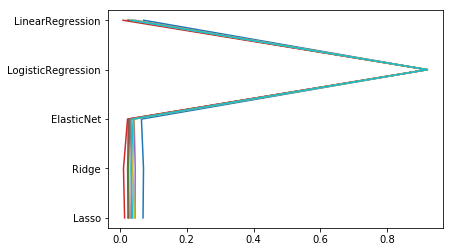

In [140]:
for i in range(10):
    plt.plot(compare2[i], compare2.index)
plt.xlim()
plt.show()

In [148]:
all_model_name_real=all_model_name+all_model_name_reg+['LinearRegression(PCA)', 'LinearRegression(PLS)']
all_accuracy_score_real=all_accuracy_score+all_accuracy_score_reg+[0.658906, 0.663848]
all_precision_score_real=all_precision_score+all_precision_score_reg+[0.148514, 0.150657]

In [149]:
df=pd.DataFrame({'model':all_model_name_real,
                'accuracy_score': all_accuracy_score_real,
                'precision_score': all_precision_score_real})

In [150]:
df
df['total']=df['accuracy_score']+df['precision_score']
df

,model,accuracy_score,precision_score,total
0,DecisionTreeClassifier,0.923214,0.600000,1.523214
1,RandomForestClassifier,0.923810,0.727273,1.651082
2,BaggingClassifier,0.919048,0.428571,1.347619
3,KNeighborsClassifier,0.914881,0.083333,0.998214
4,AdaBoostClassifier,0.922024,0.562500,1.484524
5,SVC,0.920833,0.000000,0.920833
6,Perceptron,0.920833,0.000000,0.920833
7,Lasso,0.505952,0.131217,0.637169
8,Ridge,0.547619,0.136732,0.684351
9,ElasticNet,0.586905,0.142675,0.729580


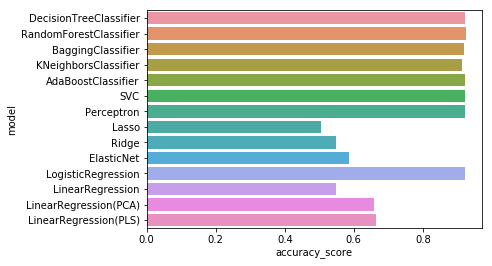

In [151]:
sns.barplot(x='accuracy_score', y='model', data=df)

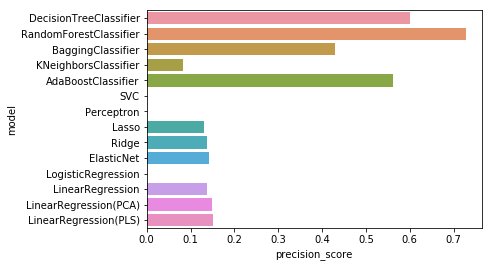

In [152]:
sns.barplot(x='precision_score', y='model', data=df)

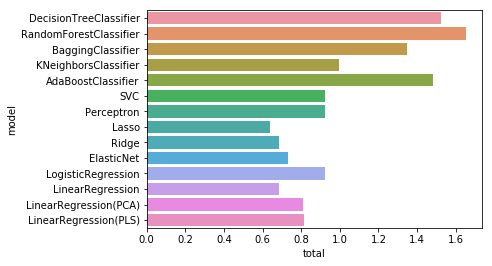

In [153]:
sns.barplot(x='total', y='model', data=df)